---


**Machine Learning**

**Mohsen Iranmanesh**

**98155002**


---

# Designing Multi Layer Perceptron (MLP)

**We define a layer as a Class with a specific properties**

**Each layer is capable of performing two things:**

1. Process input to get output: output = layer.forward(input)

2. Propagate gradients through itself: grad_input = layer.backward(input, grad_output)

In [26]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from tqdm import trange
from IPython.display import clear_output

    
class ReLU():
    def __init__(self):
        pass
    
    def forward(self, input):
        relu_forward = np.maximum(0,input)
        return relu_forward
    
    def backward(self, input, grad_output):
        relu_grad = input > 0
        return grad_output*relu_grad
    

class Dense():
    def __init__(self, input_units, output_units, learning_rate=0.1):
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc=0.0, scale = np.sqrt(2/(input_units+output_units)), size = (input_units,output_units))
        self.biases = np.zeros(output_units)
        
    def forward(self,input):        
        return np.dot(input,self.weights) + self.biases
    
    def backward(self,input,grad_output):
        grad_input = np.dot(grad_output, self.weights.T)
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis=0)*input.shape[0]
         
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        
        return grad_input
    
def softmax_crossentropy_with_logits(logits,reference_answers):
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return xentropy

def grad_softmax_crossentropy_with_logits(logits,reference_answers):
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    return (- ones_for_answers + softmax) / logits.shape[0]

def forward(network, X):
    activations = []
    input = X
    for l in network:
        activations.append(l.forward(input))
        input = activations[-1]
    return activations

def predict(network,X):
    # Compute network predictions. Returning indices of largest Logit probability
    logits = forward(network,X)[-1]
    return logits.argmax(axis=-1)

def train(network,X,y):    
    # Get the layer activations
    layer_activations = forward(network,X)
    layer_inputs = [X]+layer_activations  #layer_input[i] is an input for network[i]
    logits = layer_activations[-1]
    
    # Compute the loss and the initial gradient
    loss = softmax_crossentropy_with_logits(logits,y)
    loss_grad = grad_softmax_crossentropy_with_logits(logits,y)
    
    # Propagate gradients through the network
    # Reverse propogation as this is backprop
    for layer_index in range(len(network))[::-1]:
        layer = network[layer_index]
        
        loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) #grad w.r.t. input, also weight updates
        
    return np.mean(loss)

---


**Here we will :**

**1. import the Heart Disease dataset and perform a data cleaning on the rows that have invalid numbers (-100000) in the "ca" or "thal" columns**

**2. Split the data columns into X and y.**

**3. Normalize the values of input X.**

---

In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel('Heart_Disease.xls', sheet_name='data')
df = df[df.ca != -100000]
df = df[df.thal != -100000]

y = df['num']
X = df.drop(columns=['num'])

scaler_x = MinMaxScaler()
scaler_x.fit(X)
X = scaler_x.transform(X)

y = y.values.reshape(-1, 1)
scaler_y = MinMaxScaler()
scaler_y.fit_transform(y)
y = scaler_y.transform(y)[:,0].astype('int')

y

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

---

**Let's split the data to train, validation and test sets**

---

In [28]:
from sklearn.model_selection import train_test_split 

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation, y_validation, test_size=0.5)

---

**Its time to create the Network**

**We will add 2 hidden layers with 100 and 200 nodes and the ReLU activation layers between them**

**Then the model will be trained in 50 epochs and the Train and Accuracy will be ploted.**

---

Epoch 49
Train accuracy: 0.8840579710144928
Val accuracy: 0.8888888888888888


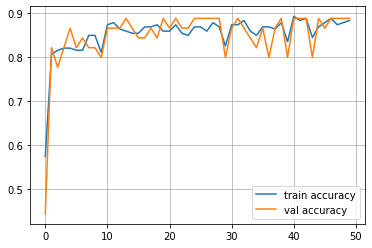

In [37]:
network = []
network.append(Dense(X_train.shape[1],100))
network.append(ReLU())
network.append(Dense(100,200))
network.append(ReLU())
network.append(Dense(200,6))

train_log = []
val_log = []
batchsize=20

for epoch in range(50):
    indices = np.random.permutation(len(X_train))
    for start_idx in range(0, len(X_train) - batchsize + 1, batchsize):
        excerpt = indices[start_idx:start_idx + batchsize]
        x_batch = X_train[excerpt]
        y_batch = y_train[excerpt]
        train(network,x_batch,y_batch)
    
    train_log.append(np.mean(predict(network,X_train)==y_train))
    val_log.append(np.mean(predict(network,X_validation)==y_validation))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    plt.plot(train_log,label='train accuracy')
    plt.plot(val_log,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

---

**Now we will test our trained model and report the metrics**

---

In [38]:
from sklearn.metrics import classification_report

y_predict = predict(network,X_test)
target_names = ['sick', 'healthy']

print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

        sick       0.72      0.86      0.78        21
     healthy       0.85      0.71      0.77        24

    accuracy                           0.78        45
   macro avg       0.78      0.78      0.78        45
weighted avg       0.79      0.78      0.78        45



---


**In the final step we will do all the stuff again with the Soccer History Dataset and report the metrics**


---

Epoch 49
Train accuracy: 1.0
Val accuracy: 0.9998276753403412


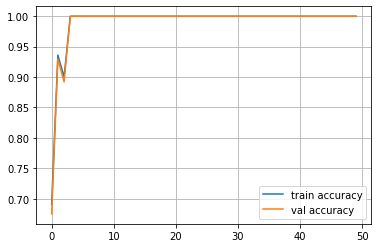

              precision    recall  f1-score   support

        Loss       1.00      1.00      1.00      1292
        Draw       1.00      1.00      1.00      1717
         Win       1.00      1.00      1.00      2794

    accuracy                           1.00      5803
   macro avg       1.00      1.00      1.00      5803
weighted avg       1.00      1.00      1.00      5803



In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report


df = pd.read_excel('soccer_international_history_dataset.xlsx', sheet_name='data')

categorical_columns = ['home_country', 'away_country', 'match_type', 'match_city', 'match_country']
categorical_prefix = ['home_country_', 'away_country_', 'match_type_', 'match_city_', 'match_country_']

encoder = OneHotEncoder(handle_unknown='ignore')

for column in categorical_columns:
    df[column] = df[column].astype('category')

X = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_prefix)

X = X.drop(columns=['home_team_result', 'match_date'])

y = df['home_team_result']
y = pd.get_dummies(y, columns=['home_team_result'], prefix='home_team_result_')

y = np.argmax(y.values, axis=1)

display(y)

X_columns = X.columns

scaler_x = MinMaxScaler()
scaler_x.fit(X)
X = scaler_x.transform(X)

# y = y.reshape(-1, 1)
# scaler_y = MinMaxScaler()
# scaler_y.fit_transform(y)
# y = scaler_y.transform(y)

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation, y_validation, test_size=0.5)

network = []
network.append(Dense(X_train.shape[1],100))
network.append(ReLU())
network.append(Dense(100,200))
network.append(ReLU())
network.append(Dense(200,3))

train_log = []
val_log = []
batchsize=20

for epoch in range(50):
    indices = np.random.permutation(len(X_train))
    for start_idx in range(0, len(X_train) - batchsize + 1, batchsize):
        excerpt = indices[start_idx:start_idx + batchsize]
        x_batch = X_train[excerpt]
        y_batch = y_train[excerpt]
        train(network,x_batch,y_batch)
    
    train_log.append(np.mean(predict(network,X_train)==y_train))
    val_log.append(np.mean(predict(network,X_validation)==y_validation))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    plt.plot(train_log,label='train accuracy')
    plt.plot(val_log,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    
y_predict = predict(network,X_test)
target_names = ['Loss', 'Draw', 'Win']

print(classification_report(y_test, y_predict, target_names=target_names))